Basé sur l'article "[The KL-UCB algortihm for bounded stochastic bandits and beyond](https://arxiv.org/abs/1102.2490)" de **Aurélien Garivier** et **Olivier Cappé**.

In [264]:
%reset -f
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [265]:
%load_ext autoreload
%autoreload 2
import kl_ucb_policy, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [266]:
#Initialisation des données
T= 500 #Nombre de périodes
runs = 10
#Nombre d'itérations
p = np.array([0.99, 0.98, 0.96, 0.93, 0.90, 0.10, 0.06, 0.04]) #Paramètres des Bernoulli
rate = np.array([6, 9, 12, 18, 24, 36, 38, 54])
K = p.shape[0] #Nombre de bras
delta = ( np.ones(K)*np.max(p) ) - p

In [267]:
%%capture
klucb_dichotomie = kl_ucb_policy.KLUCBPolicy(K, rate, kl_ucb_policy.klucb_upper_bisection)

total_rewards_list_klucb_dichotomie = np.zeros((runs,T))
sub_arm_list_klucb_dichotomie = []
start_time = time.time()

for run in range(runs):
    klucb_dichotomie.reset()
    actions = np.zeros((K, T), dtype=np.int)
    rewards = np.zeros((K, T), dtype=np.int)

    for t in range(T):
        arm = klucb_dichotomie.select_next_arm()
        actions[arm, t] = 1
        rewards[arm, t] = np.random.binomial(1, p[arm])*rate[arm]
        klucb_dichotomie.update_state(arm, rewards[arm, t]/rate[arm])

    cumulative_rewards = np.cumsum(rewards, axis=1) #Reward accumulé pour chaque bras en fonction du temps
    total_rewards = np.sum(cumulative_rewards, axis=0) #Reward sur tout les bras accumulé en fonction du temps
    total_rewards_list_klucb_dichotomie[run,:] = np.copy(total_rewards)
    sub_arm = np.copy(actions[0,])
    sub_arm_list_klucb_dichotomie.append(sub_arm)

time_spent_klucb_dichotomie = time.time() - start_time

In [268]:
print("Time for KL-UCB (dichotomie), with T =", T, ", runs =", runs, ":", (time_spent_klucb_dichotomie), "seconds")

Time for KL-UCB (dichotomie), with T = 500 , runs = 10 : 1.9871866703033447 seconds


In [269]:
#klucb dichotomie
utils.write_data(sub_arm_list_klucb_dichotomie, total_rewards_list_klucb_dichotomie, 'klucb_dichotomie')

## Résultats

On récupère les données nécessaires à l'affichage

In [270]:
#kl-ucb dichotomie
sub_arm_list_klucb_dichotomie, total_rewards_list_klucb_dichotomie = utils.get_data("data/scenario_1_klucb_dichotomie.pkl")

mean_total_rewards_list_klucb_dichotomie, mean_sub_arm_klucb_dichotomie, sub_arm_draws_T_klucb_dichotomie = utils.get_results(total_rewards_list_klucb_dichotomie,
                                                                                                                        sub_arm_list_klucb_dichotomie)


### Gain total des différents algorithmes

Run n° 2


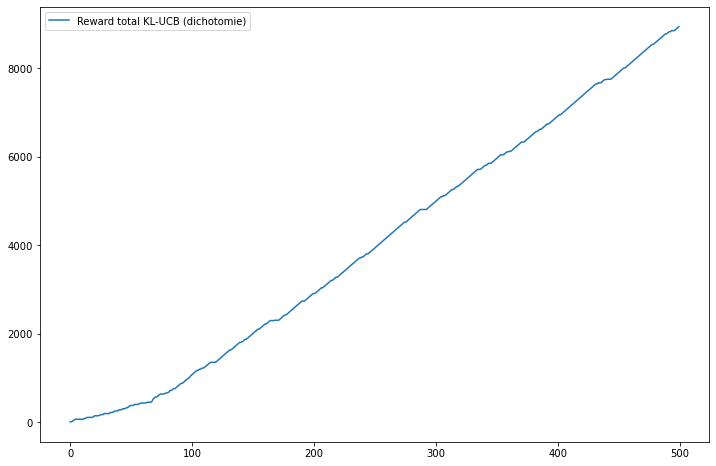

In [271]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)

run = random.choice(range(runs))
print('Run n°', run)
ax1.plot(total_rewards_list_klucb_dichotomie[run,:],linestyle='-',label='Reward total KL-UCB (dichotomie)')
ax1.legend(loc='best')
plt.show()

### Gain moyen total des différents algorithmes

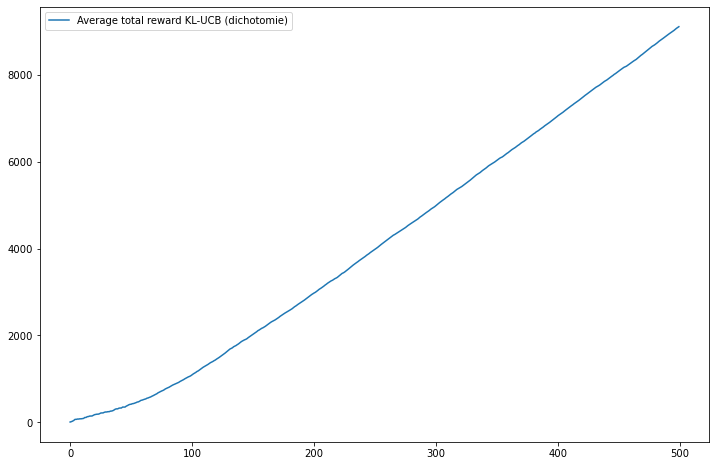

In [272]:
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(mean_total_rewards_list_klucb_dichotomie[:],linestyle='-',label='Average total reward KL-UCB (dichotomie)')
ax1.legend(loc='best')
plt.show()

### Evolution moyenne du Pseudo-Regret en fonction de t

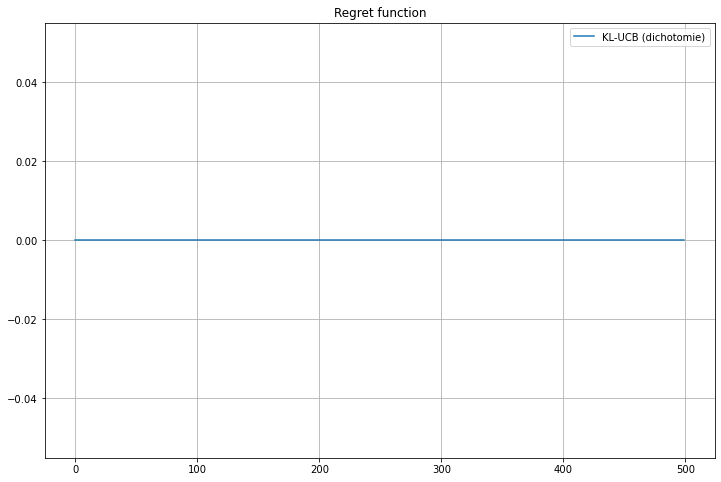

In [273]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.cumsum(mean_sub_arm_klucb_dichotomie)*delta[0], linestyle='-', label='KL-UCB (dichotomie)')
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Regret function')
#plt.xlim( 10**2, 2*10**4 ) 
plt.show()

### Boxplot de distribution du Pseudo-Regret à $t = 5000$

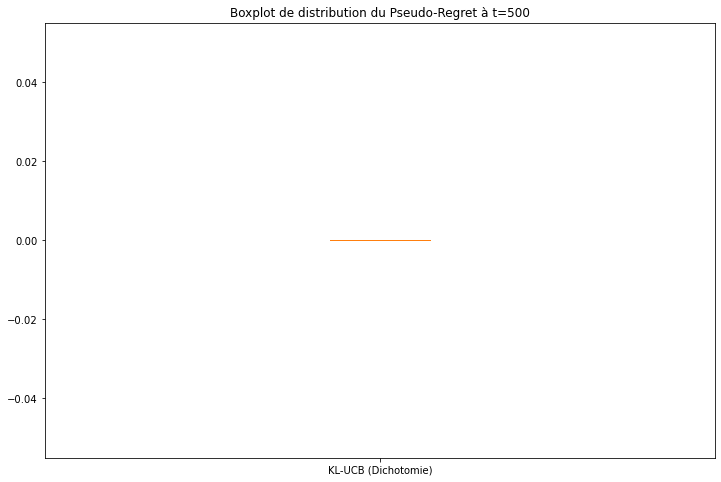

In [274]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.boxplot([
        sub_arm_draws_T_klucb_dichotomie*delta[0],
    ])
ax.set_xticklabels(['KL-UCB (Dichotomie)'])
ax.set_title('Boxplot de distribution du Pseudo-Regret à t='+str(T))
plt.show()

## Enregistrer les données